In [171]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [172]:
def get_path(spin, res):
    return f'img_dump/SPO/SgrA/a{spin}_i30_f230.e9/nn{res}.h5'

def readimg(fname, **kwargs):
    # Return intensity from path of a snapshot
    hfp = h5py.File(fname,'r')
    imagep = np.copy(hfp['pol']).transpose((1,0,2))
    I = imagep[:,:,0]
    scale = hfp['header']['scale'][()]
    return I, scale

def downsampling(array, i):
    # Downsample the 2d array by choosing every ith pixel only
    return array[0::i,0::i]

def get_total_I(I, scale, avg=False):
    if avg:
        return np.average(I)
    else:
        return I.sum()*scale

In [174]:
aspin = ['-0.94', '-0.5', '0', '+0.5', '+0.94']

In [181]:
# Downsampling 1500x1500 image
def downsample_plot(ax, log=False):
    downsample_i = [1, 2, 3, 4, 5, 6, 10, 12, 15, 20, 25, 30, 50, 60, 75, 100, 125, 150, 250, 300, 375, 500, 750, 1500]
    downsample_i.reverse()
    for spin in aspin:
        mse = []
        path = get_path(spin, '1500')
        Imap, scale = readimg(path)
        I = get_total_I(Imap, scale)
        for i in downsample_i:
            Imap_downsampled = downsampling(Imap, i)
            mse.append((get_total_I(Imap_downsampled, scale * i ** 2) - I) ** 2)
        ax.plot(1500 / np.array(downsample_i[:-1]), mse[:-1], label=rf'$a_{{spin}}={spin}$')
    ax.set_xlabel("Resolution")
    ax.set_ylabel("MSE")

    if log:
        ax.set_yscale('log')
        ax.set_xscale('log')

In [180]:
# Running Resolution from 100x100 to 1500x1500
def res_plot(ax, log=False):
    resolution = list(range(100, 1600, 100))
    for spin in aspin:
        mse = []
        I_list = []
        path = get_path(spin, '1500')
        Imap, scale = readimg(path)
        I = get_total_I(Imap, scale)
        for nn in resolution:
            nn_path = get_path(spin, nn)
            nn_Imap, nn_scale = readimg(nn_path)
            nn_I = get_total_I(nn_Imap, nn_scale)
            I_list.append(nn_I)
            mse.append((nn_I - I) ** 2)
        ax.plot(resolution[:-1], mse[:-1], label=rf'$a_{{spin}}={spin}$')
    ax.set_xlabel("Resolution")
    ax.set_ylabel("MSE")

    if log:
        ax.set_yscale('log')
        ax.set_xscale('log')

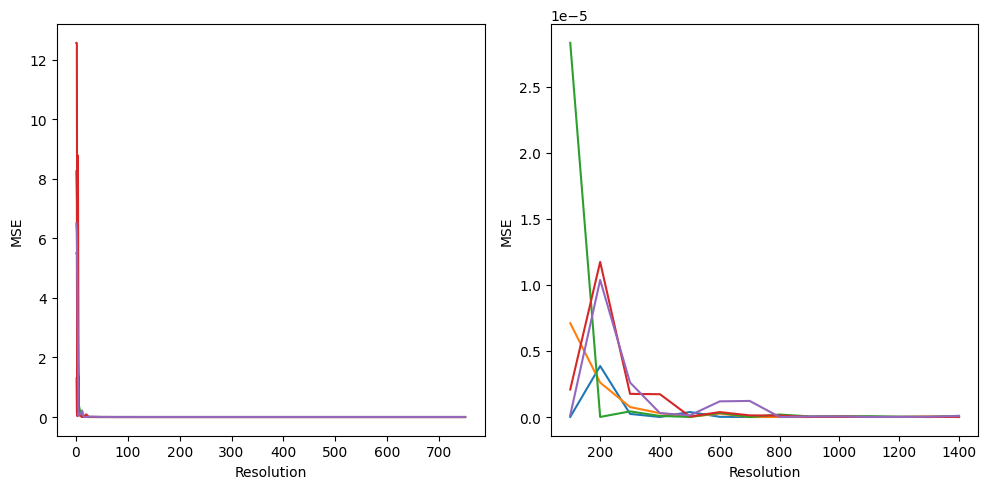

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
downsample_plot(ax[0])
res_plot(ax[1])
plt.tight_layout()

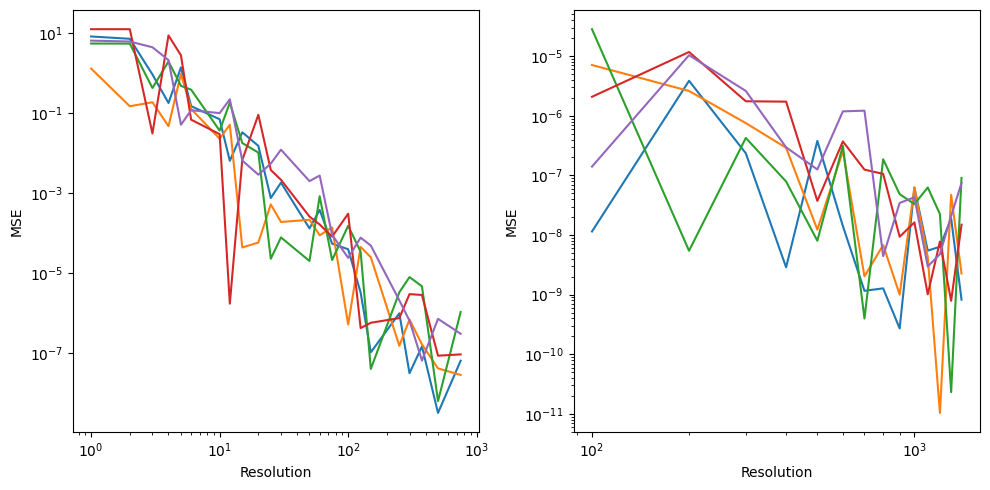

In [184]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
downsample_plot(ax[0], log=True)
res_plot(ax[1], log=True)
plt.tight_layout()